# Librerias y conexión

In [4]:
pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import unicodedata

# Extracción de datos

### Funciones

In [6]:
# Función para reordenar las columnas de un dataframe
def reordenar_columnas(df):
    # Identificar la columna de número de cuenta
    columna_numero_cuenta = None
    for col in df.columns:
        if "de cuenta" in col.lower():
            columna_numero_cuenta = col
            break

    # Asegurarse de que la columna de número de cuenta fue encontrada
    if columna_numero_cuenta:
        # Reordenar las columnas
        columnas_ordenadas = ['Marca temporal', columna_numero_cuenta] + [col for col in df.columns if col not in ['Marca temporal', columna_numero_cuenta]]
        df = df[columnas_ordenadas]

    return df

def convertir_a_string(df):
    for col in df.columns[1:]:  # Omitimos la primera columna
        df[col] = df[col].astype(str)  # Convertimos cada columna a str de manera individual
    return df


### Importaciónd de datos desde drive

In [7]:
folder_path = r'C:\Users\gudis\Documents\Obsidian Master\Librero\UNAM\8vo Semestre\Minería de Datos\KPIS'

# Listar los archivos de Excel en la carpeta
files = os.listdir(folder_path)
excel_files = [f for f in files if f.endswith('.csv') or f.endswith('.csv')]

# Diccionarios para almacenar los DataFrames y la relación número-nombre
dataframes = {}
file_map = {}

for i, file in enumerate(excel_files, start=1):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=0)  # Usa la primera fila como encabezado
    dataframes[i] = df  # Guarda el DataFrame con un número
    file_map[i] = file  # Guarda la relación número-nombre

# Mostrar el mapeo entre números y nombres originales
print(" Mapeo de archivos:")
for key, value in file_map.items():
    print(f"{key}: {value}")

 Mapeo de archivos:
1: CaminoProfesionalMAC1.csv
2: Finanzas Transparentes (Respuestas).csv
3: Habilidades de MAC (respuestas).csv
4: Impacto del Horario en el Desempeño y Bienestar de los Estudiantes de Minería de Datos (respuestas).csv
5: Perfil Académico (respuestas).csv
6: Rendimiento académico (respuestas).csv
7: Uso de Tecnología y Redes Sociales.csv


### Muestra de dataframe

In [8]:
# Acceder a un DataFrame específico por número
dataframes[2]

,Marca temporal,Número de cuenta,1. ¿Cuánto dinero generas al mes?,2. ¿Cuánto gastas mensualmente considerando todos tus gastos?,3. ¿Cuánto dinero logras ahorrar al mes?,"4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?",5. ¿Tu dinero tiene liquidez o está comprometido en inversiones o deudas?,6. ¿Cuentas con inversiones a corto plazo?,7. ¿Cuentas con inversiones a largo plazo?,8. ¿Tienes un plan personal de retiro o planeas tener uno en el futuro?,9. ¿Cuántas tarjetas de crédito tienes?,10. ¿Qué porcentaje de tu línea de crédito tienes disponible actualmente?
0,2025-02-24 19:55:55.274,314687144,22,"Entre 15,000 - 16,000","Entre 2,000 - 5,000",5,"la gran mayoría si tiene liquidez, pero tambié...",no,no,si,2,0.95
1,2025-02-25 15:27:17.467,422075345,"$20,000","$10,000 aprox","$10,000","$40,000",Tiene liquidez,si,no,Tal vez lo considere en el futuro,1,0.85
2,2025-02-26 03:44:59.363,318104263,No genero.,4000,3000,"Si, 20000",Estoy comprometido en inversiones.,No,Si,Si,Ninguna,No aplica
3,2025-02-27 19:38:21.613,421039692,4000,3000,1000,2000,No,No,No,No,0,0
4,2025-02-27 20:07:15.769,317075261,19000,$10000,$4000,Si,Si,No,Si,Si,2,0.5
5,2025-02-28 00:22:20.116,422068044,0,3500,0,8000,no,si,no,no,0,0
6,2025-02-28 17:05:40.993,42107105,8000,5200,0,3000,tiene liquidez,no,no,no,2,8400
7,2025-02-28 17:24:39.661,422079312,0,8000,1000,"sí, unos 5k",inversiones y deudas de la tarjeta de crédito,"si, en mercado pago y nu",no,crear uno en el futuro aunque es más prometedo...,1,0.3
8,2025-02-28 17:25:08.189,319289619,"7,000 pesos",2.5,4.5,4000,Liquidez por ahora,Solo en Cripto monedas de mercado libre,Por el momento no,Planeo tener uno en el futuro,1,14
9,2025-02-28 17:47:44.002,317237748,4000,3500,300,"Si, unos 1000",Liquidez,Si,No,Planeo tener uno,1,0.2


In [9]:
# Aplicar la función de orden y luego la conversión a string
for df_id, df in dataframes.items():
    dataframes[df_id] = reordenar_columnas(df)  # Reordenar columnas
    dataframes[df_id] = convertir_a_string(dataframes[df_id])  # Convertir a string excepto la primera columna


In [10]:


# Iterar sobre los DataFrames en el diccionario `dataframes`
for i, df in dataframes.items():
    # Acceder al nombre de la segunda columna
    segunda_columna = df.columns[2]  # La segunda columna tiene índice 1
    print(f"Encabezado de la i columna en el DataFrame {i}: {segunda_columna}")

def normalizar_respuesta(respuesta, categorias):
    # Convertir la respuesta a minúsculas y eliminar espacios
    respuesta = str(respuesta).strip().lower()
    
    # Buscar la categoría correspondiente
    for categoria, palabras_clave in categorias.items():
        for palabra in palabras_clave:
            if palabra.lower() in respuesta:
                return categoria  # Retorna la categoría si hay coincidencia
    
    return "No Clasificado"  # Si no coincide con ninguna categoría

def procesar_cuestionario(df, respuestas_esperadas):
    # Crear una copia del DataFrame para no modificar el original
    df_normalizado = df.copy()
    
    # Iterar sobre las preguntas (columnas) a partir de la tercera columna
    for pregunta in df.columns[2:]:
        if pregunta in respuestas_esperadas:
            categorias = respuestas_esperadas[pregunta]
            df_normalizado[pregunta] = df[pregunta].apply(lambda x: normalizar_respuesta(x, categorias))
    
    return df_normalizado

def calcular_kpis(df_normalizado):
    kpis = {}
    
    # Iterar sobre las preguntas (columnas) a partir de la tercera columna
    for pregunta in df_normalizado.columns[2:]:
        # Contar la frecuencia de cada categoría
        distribucion = df_normalizado[pregunta].value_counts(normalize=True) * 100
        kpis[pregunta] = distribucion.to_dict()  # Guardar como porcentaje
    
    return kpis

def graficar_kpis(kpis):
    for pregunta, distribucion in kpis.items():
        categorias = list(distribucion.keys())
        porcentajes = list(distribucion.values())
        
        plt.figure(figsize=(8, 6))
        plt.bar(categorias, porcentajes, color='skyblue')
        plt.title(f"Distribución de respuestas: {pregunta}")
        plt.ylabel("Porcentaje")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Encabezado de la i columna en el DataFrame 1: ¿Cuál es tu mayor preocupación al terminar tus estudios?
Encabezado de la i columna en el DataFrame 2: 1.  ¿Cuánto dinero generas al mes?
Encabezado de la i columna en el DataFrame 3: Dirección de correo electrónico
Encabezado de la i columna en el DataFrame 4: Dirección de correo electrónico
Encabezado de la i columna en el DataFrame 5: 2. Edad:
Encabezado de la i columna en el DataFrame 6: ¿Cuál es tu promedio actual?
Encabezado de la i columna en el DataFrame 7: ¿Cuál es tu edad?


# Limpieza de datos

## Funciones

In [37]:
# Función para clasificar una respuesta
def clasificar_respuesta(respuesta, respuestas_esperadas):
    # Asegurarse de que la respuesta sea una cadena
    if isinstance(respuesta, str):
        respuesta = respuesta.lower()
    else:
        respuesta = str(respuesta).lower()  # Convertir cualquier tipo a cadena y luego en minúsculas

    # Quitar acentos de la respuesta
    respuesta = ''.join(
        c for c in unicodedata.normalize('NFD', respuesta) if unicodedata.category(c) != 'Mn'
    )

    # Ahora comparar con las palabras clave
    for categoria, palabras_clave in respuestas_esperadas.items():
        for palabra in palabras_clave:
            # Quitar acentos de las palabras clave
            palabra_sin_acentos = ''.join(
                c for c in unicodedata.normalize('NFD', palabra.lower()) if unicodedata.category(c) != 'Mn'
            )
            if palabra_sin_acentos in respuesta:  # Compara sin distinguir mayúsculas/minúsculas
                return categoria
    return "No Clasificado"  # Si no se encuentra ninguna coincidencia

def procesar_dataframe(df, respuestas_esperadas_df, preguntas_especiales):
    # Guardar el orden original de las columnas
    orden_columnas = df.columns.tolist()

    # Separar preguntas normales y especiales
    preguntas_normales = []
    preguntas_especiales_ = {'correos': [], 'cantidades': []}

    for pregunta in df.columns[2:]:  # Ignorar las primeras dos columnas
        if pregunta in preguntas_especiales['correos']:
            preguntas_especiales_['correos'].append(pregunta)
        elif pregunta in preguntas_especiales['cantidades']:
            preguntas_especiales_['cantidades'].append(pregunta)
        else:
            preguntas_normales.append(pregunta)

    # Procesar preguntas normales
    df_normal = df[preguntas_normales].copy()
    for pregunta in preguntas_normales:
        pregunta_respuestas_esperadas = respuestas_esperadas_df.get(pregunta, {})
        df_normal[pregunta] = df_normal[pregunta].apply(lambda x: clasificar_respuesta(x, pregunta_respuestas_esperadas))

    # Procesar preguntas especiales
    df_especial = df[preguntas_especiales_['correos'] + preguntas_especiales_['cantidades']].copy()

    for columna in preguntas_especiales_['correos']:
        df_especial[columna] = df_especial[columna].apply(lambda x: x if '@' in str(x) else None)


    for columna in preguntas_especiales_['cantidades']:
        df_especial[columna] = df_especial[columna].apply(limpiar_cantidad)

    # Unir todo
    df_clean = pd.concat([df.iloc[:, :2], df_normal, df_especial], axis=1)

    # Reordenar las columnas para que coincidan con el original
    df_clean = df_clean[orden_columnas]

    return df_clean

def limpiar_cantidad(valor):
    if not isinstance(valor, str):
        return None  # Si no es string, no se puede procesar
    
    # Buscar el primer número o número con 'K'
    match = re.search(r"\d+(\.\d+)?[Kk]?", valor)
    if not match:
        return None  # Si no encuentra ningún número, devuelve None
    
    cantidad = match.group(0)  # Obtener la coincidencia
    
    # Convertir '3K' en 3000
    if 'K' in cantidad.upper():
        cantidad = float(cantidad.replace('K', '').replace('k', '')) * 1000
    else:
        cantidad = float(cantidad)
    
    return cantidad





## Obtención de números de cuenta


In [12]:
import re

# Inicializamos un conjunto vacío para almacenar los IDs únicos
ids_unicos = set()

# Iteramos sobre cada DataFrame dentro del diccionario
for key, df in dataframes.items():  # `dataframes` es un diccionario
    if isinstance(df, pd.DataFrame):  # Verificamos que sea un DataFrame
        # Extraemos los primeros 9 dígitos numéricos de la segunda columna
        ids = df.iloc[:, 1].dropna().astype(str).apply(
            lambda x: re.search(r'\d{9}', x).group(0) if re.search(r'\d{9}', x) else None
        )
        ids_unicos.update(ids.dropna().unique())  # Eliminamos NaN y duplicados
    else:
        print(f"Advertencia: El valor asociado a {key} no es un DataFrame ({type(df)})")

# Convertimos el conjunto en una lista ordenada (opcional)
ids_unicos = sorted(ids_unicos)

print(f"Total de IDs únicos: {len(ids_unicos)}")
ids_unicos

Total de IDs únicos: 22


['314687144',
 '315124208',
 '316201737',
 '316348838',
 '317075261',
 '317237748',
 '318038414',
 '318104263',
 '318709734',
 '319024791',
 '319173930',
 '319289619',
 '419083238',
 '421039692',
 '421041149',
 '421077205',
 '421087105',
 '422041654',
 '422068044',
 '422075345',
 '422079312',
 '422087359']

## Respuestas esperadas

In [13]:
def generar_diccionario_respuestas_esperadas(dataframes):
    # Diccionario donde se almacenarán las preguntas por dataframe
    respuestas_esperadas = {}

    for df_id, df in dataframes.items():
        # Crear un diccionario para cada dataframe con el id correspondiente
        respuestas_esperadas[df_id] = {}

        # Recorrer las columnas de las preguntas (omite las primeras dos columnas: fecha y número de cuenta)
        for pregunta in df.columns[2:]:
            # Agregar la pregunta al diccionario y dejar la lista de respuestas vacía para completar
            respuestas_esperadas[df_id][pregunta] = {}

    return respuestas_esperadas

responses=generar_diccionario_respuestas_esperadas(dataframes)
# Diccionario principal con las respuestas esperadas por dataframe

In [14]:
responses

{1: {'¿Cuál es tu mayor preocupación al terminar tus estudios?': {},
  '¿Qué factores influyen más en tu decisión sobre qué camino seguir después de egresar?': {},
  '¿Cuál es tu situación actual respecto a la elección de un camino profesional después de egresar?': {},
  '¿Qué tipo de apoyo crees que te ayudaría más en esta etapa de decisión?': {},
  '¿Qué habilidades o conocimientos crees que son esenciales para tomar una decisión sobre tu especialización o carrera profesional después de egresar?': {},
  '¿En qué medida consideras que las prácticas profesionales o proyectos extracurriculares influirán en tu decisión de que camino seguir?': {},
  '¿Cómo visualizas tu carrera profesional dentro de 5 años? ¿Qué tipo de trabajo o proyectos te gustaría estar realizando?': {},
  '¿Qué es lo que más valoras en un posible empleo o área de especialización después de terminar tu carrera?': {},
  '¿Qué tan útil consideras el material de estudio de la carrera para conseguir trabajo?': {},
  '¿Sie

In [15]:
# Definir las preguntas especiales
preguntas_especiales = {
    'correos': [
        # Las que contienen correos
        'Dirección de correo electrónico'

    ],
    'cantidades': [  # Las que contienen cantidades
        '1.  ¿Cuánto dinero generas al mes?',
        '2. ¿Cuánto gastas mensualmente considerando todos tus gastos?',
        '3. ¿Cuánto dinero logras ahorrar al mes?',
        '¿Cuánto tiempo tardas en llegar a casa después de la clase? (Escribe tu respuesta en minutos)',
        '2. Edad:',
        '6. ¿Cuánto tiempo en minutos dura tu recorrido a la Facultad?',
        '¿Cuál es tu edad?',
    ]
}



In [29]:
respuestas_esperadas={
    1: {
        '¿Cuál es tu mayor preocupación al terminar tus estudios?': {
        "Trabajo": [
            "Trabajo", "Empleo", "trabajo", "empleo", "chamba"
        ],
        "Obtener el título": [
            "Título", "Graduación", "Titularme", "Obtener mi título", "Certificación"
        ],
        "Estabilidad económica": [
            "Estabilidad económica", "Ingresos", "Dinero", "Finanzas", "Comer", "Alimento","comer"
        ],
        "Otro": [
            "inglés", "sociedad", 
            "Qué hacer con mi vida", "felicidad", 
            "carrera", "jubilarme"
        ],
        "Ninguna": [
            "Nada", "Ninguna", "ninguna", "No tengo preocupaciones", "Hasta ahorita ninguna"
        ]
        },
        '¿Qué factores influyen más en tu decisión sobre qué camino seguir después de egresar?': {
            "Económico": ["Económico","economicamente", "Finanzas", "Ingresos", "Dinero", "Problemas financieros","Sueldo","Salario","chamba","comer","decorosa","economica","trabajo"],
            "Social": ["Social", "Entorno", "Familia", "Amigos", "Red de apoyo"],
            "Vocacional": ["Vocación", "Intereses personales", "Pasión", "Lo que me gusta","Conocimientos","interés","vida","materias"],
            "Otro": ["Otro", "No aplica", "Sin influencia","oportunidades","feliz"]
        },
        '¿Cuál es tu situación actual respecto a la elección de un camino profesional después de egresar?': {
        "Seguro": [
            "Ya tengo un camino pensado y empezado", "Creo que lo tengo claro", 
            "Estoy trabajando en algo que me gusta", "Me siento cómodo","maestria","comodo","titulo","puesto","tranquila","ser","trabajando"
        ],
        "Indeciso": [
            "Me siento indeciso", "Confundida si estoy", "No he elegido uno de forma segura", 
            "Indefinida aún", "Posponiendo la decisión","posponiendo","complicado"
        ],
        "Explorando opciones": [
            "Buscando buenas opciones de trabajo", "Explorando posibilidades", 
            "Evaluando opciones", "Quiero trabajar en algo que me guste"
        ],
        "Otro": [
            "Chida", "No aplica", "No lo sé"
        ]
    },
    '¿Qué tipo de apoyo crees que te ayudaría más en esta etapa de decisión?': {
        "Económico": [
            "Tener transporte propio", "Económico", "1000000 de pesos para pensar tranquilo"
        ],
        "Orientación profesional": [
            "Conferencias", "Alguna inducción profesional", "Guía en la forma de titulación", 
            "Cursos en la carrera orientados a sectores específicos"
        ],
        "Red de contactos": [
            "Networking", "Conocer a personas que han estado en la misma situación"
        ],
        "Otro": [
            "Ninguno", "No aplica"
        ]
    },
    '¿Qué habilidades o conocimientos crees que son esenciales para tomar una decisión sobre tu especialización o carrera profesional después de egresar?': {
        "Conocimiento del campo laboral": [
            "Tener conocimiento sobre el campo laboral y cómo desempeñarse", 
            "Conocer el futuro laboral en cuanto a actividades a realizar y conocimientos que se deben tener", 
            "Los perfiles de las ofertas de vacantes", 
            "Tener un panorama completo acerca de las opciones que existen"
        ],
        "Autoconocimiento y toma de decisiones": [
            "Saber qué pasos tomar y tener un mayor autoconocimiento", 
            "Qué te gusta, para qué eres bueno y qué te deja dinero, solo puedes elegir dos", 
            "Si pudiera conocer la mejor elección sería muy fácil", 
            "Conocer muy bien de qué trata cada área de especialización"
        ],
        "Habilidades técnicas específicas": [
            "Las mates aplicadas junto con la programación", 
            "Estadística, computación", 
            "Desarrollo de entrevistas y creación de CV para ser considerado en mejores vacantes", 
            "Sueldos y mis habilidades"
        ],
        "Habilidades blandas y estratégicas": [
            "Pensamiento crítico", 
            "Buenas comunicación", 
            "Dominio del inglés", 
            "El saber expresar lo que quiero y lo que sé hacer para llegar a lograrlo", 
            "Mmmm networking"
        ],
        "Planificación académica y profesional": [
            "Para alumnos de 6to semestre, debes de conocer cuál es su área que les gusta y en cuál se sienten más versados para de ese modo sabrán qué optativas elegir y a dónde dirigir sus esfuerzos"
        ],
        "Otro": [
            "Tener la disposición de aprender lo que no sabes"
        ]
    },
    '¿En qué medida consideras que las prácticas profesionales o proyectos extracurriculares influirán en tu decisión de qué camino seguir?': {
        "Mucho": [
            "Mucho", "Bastante", "Demasiado", "Influyen mucho"
        ],
        "Poco": [
            "Poco", "Nada", "No influyen mucho"
        ]
    },
    '¿Cómo visualizas tu carrera profesional dentro de 5 años? ¿Qué tipo de trabajo o proyectos te gustaría estar realizando?': {
        "Liderazgo": [
            "Ser director en la empresa en la que trabajo", "Ser el líder de una empresa", 
            "Alguna gerencia"
        ],
        "Estabilidad": [
            "Teniendo un trabajo estable", "Trabajando en algo que me guste", 
            "Haber crecido en mi trabajo actual"
        ],
        "Innovación": [
            "Desarrollar software", "Proyectos innovadores", "Ciencia de datos"
        ]
    },
    '¿Qué es lo que más valoras en un posible empleo o área de especialización después de terminar tu carrera?': {
        "Flexibilidad": [
            "Que sea flexible con el área de trabajo", "Balance vida-trabajo"
        ],
        "Ambiente laboral": [
            "Ambiente laboral", "Cultura de empresa", "Compañerismo", "Buen equipo"
        ],
        "Oportunidad de crecimiento": [
            "Crecimiento", "Desarrollo profesional", "Promociones", "Aprendizaje continuo"
        ],
        "Estabilidad económica": [
            "Estabilidad económica", "Buen salario", "Beneficios"
        ]
    },
    '¿Qué tan útil consideras el material de estudio de la carrera para conseguir trabajo?': {
        "Muy útil": [
            "Muy útil", "Relevante", "Aplicable", "Clave para mi carrera"
        ],
        "Poco útil": [
            "Sin utilidad", "No aplicable", "Irrelevante", "Obsoleto"
        ]
    },
    '¿Sientes que tu carrera universitaria te permitió desarrollar una red de contactos profesionales que te ha ayudado en tu camino laboral?': {
        "Sí": [
            "Sí", "Definitivamente", "Claro que sí"
        ],
        "No": [
            "No", "Para nada", "No fue útil"
        ]
    },
    '¿Qué aspectos de tu formación académica crees que podrían mejorarse para preparar mejor a los futuros egresados?': {
        "Más habilidades prácticas": [
            "Mejores habilidades", "Más práctica", "Proyectos reales", "Experiencia laboral"
        ],
        "Actualización del contenido": [
            "Contenido actualizado", "Temas modernos", "Alineación con el mercado laboral"
        ],
        "No estoy seguro": [
            "No sé", "No estoy seguro", "No tengo opinión"
        ]
    },
    '¿Consideras que el contenido de tu carrera estuvo actualizado con las necesidades actuales del mercado laboral?': {
        "Sí": [
            "Sí", "Definitivamente", "Actualizado"
        ],
        "No": [
            "No", "Desactualizado", "Irrelevante"
        ],
        "Depende del área": [
            "Depende del área", "Algunas partes sí", "Otras no"
        ]
    }
    },
  2: {
      '1.  ¿Cuánto dinero generas al mes?': {}, #No rellenar
      '2. ¿Cuánto gastas mensualmente considerando todos tus gastos?': {}, #No rellenar
      '3. ¿Cuánto dinero logras ahorrar al mes?': {}, #No rellenar
      '4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '5. ¿Tu dinero tiene liquidez o está comprometido en inversiones o deudas?': {
          "Liquidez": ["Liquid"],
          "Deudas": ["Deudas"]
      },
      '6. ¿Cuentas con inversiones a corto plazo?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '7. ¿Cuentas con inversiones a largo plazo?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '8. ¿Tienes un plan personal de retiro o planeas tener uno en el futuro?': {
          "Si": ["Si"],
          "No": ["No"],
          "Futuro": ["futuro"]
      },
      '9. ¿Cuántas tarjetas de crédito tienes?': {
          "0":["Ninguna", "cero", "no tengo", "nada","zero", "Ninguna ", " Ninguna "],
          "1":["una", "uno", "1"],
          "2":["dos", "2"],
          "3":["tres", "3"],
          "4":["cuatro","4"]
      },
      '10. ¿Qué porcentaje de tu línea de crédito tienes disponible actualmente?': {
          "0%": ["0"],
          "25-50%": ["25, 50%"],
          "50-75%": ["50, 75%"],
          "75-100%": ["75", "100%"]
      }
      },
  3: {
      'Dirección de correo electrónico': {}, #No rellenar
      '2. ¿Cómo describirías tu capacidad para explicar ideas complejas a personas que no son expertas en tu área?': {
        "Buena": ["Buena", "Clara", "Explico con facilidad"],
        "Intermedia": ["Intermedio", "Suficientemente claro", "Moderada"],
        "Mala": ["Mala", "Dificultad para explicar"]
      },
      '3. ¿Qué tan cómodo te sientes trabajando en equipo?': {
        "Cómodo": ["Cómodo", "Me siento bien", "Fluidez"],
        "Incómodo": ["Incómodo", "Dificultades para colaborar"],
        "Neutral": ["Neutral", "Ni cómodo ni incómodo"]
      },
      '4. ¿Cuál ha sido tu mayor desafío al trabajar en equipo y cómo lo superaste? ': {
        "Comunicación": ["Comunicación", "Falta de claridad"],
        "Organización": ["Organización", "Planificación deficiente"],
        "Otro": ["Otro", "Conflictos interpersonales", "Descoordinación"]
      },
      '5.¿Sientes que la carrera de MAC te ha preparado adecuadamente para el trabajo en equipo?': {
        "Si": ["Si", "Bien preparado"],
        "No": ["No", "Falta"]
      },
      '6.  ¿Qué tan fácil o difícil te resulta establecer nuevas conexiones? ': {
          "Fácil": ["Fácil", "Abierto a nuevas relaciones", "Sociable"],
          "Intermedio": ["Intermedio", "Dependiendo de la situación"],
          "Difícil": ["Difícil", "Me cuesta conocer gente nueva"]
      },
      '7. ¿Cómo te sientes al tener que hablar frente a una gran audiencia?': {
          "Nervioso": ["Nervioso", "Ansioso", "Tenso"],
          "Cómodo": ["Cómodo", "Confianza"],
          "Otro": ["Otro", "Inseguro"]
      },
      '8. ¿Qué técnicas usas para manejar el estrés y mantener la calma en situaciones difíciles?': {
          "Ejercicios de respiración": ["Ejercicios de respiración", "Meditación", "Relajación"],
          "Técnicas de manejo de tiempo": ["Manejo del tiempo", "Organización", "Prioridades"],
          "Otro": ["Otro", "Ejercicio físico", "Desconectar", "Hablar con alguien"]
      },
      '9.  ¿Cómo te preparas para presentaciones orales o exposiciones frente a un público amplio? ': {
          "Liderazgo": ["Liderazgo", "Gestión de equipos", "Tomar decisiones"],
        "Comunicación": ["Comunicación", "Escucha activa", "Expresión clara"],
        "Otro": ["Otro", "Resolución de conflictos", "Trabajo bajo presión"]

      },
      '10. ¿Crees que las habilidades técnicas (programación, matemáticas, algoritmos) son suficientes para desempeñarte en el ámbito laboral sin necesidad de habilidades blandas?': {
          "Si": ["Si", "Las habilidades técnicas son lo más importante"],
          "No": ["No", "Las habilidades blandas también son fundamentales"]
      },
      '11. ¿Has aplicado alguna de las habilidades blandas aprendidas en estos cursos en tu vida académica o personal?': {
          "Si": ["Si", "Claro"],
          "No": ["No", "Negativo"]
      },
      '12. ¿Cuáles consideras que son las habilidades blandas más importantes para un profesional de Matemáticas Aplicadas y Computación? ': {
          "Trabajo en equipo": ["Trabajo en equipo", "Colaboración"],
          "Comunicación": ["Comunicación", "Expresión efectiva"],
          "Liderazgo": ["Liderazgo", "Gestión de equipos"],
          "Otro": ["Otro", "Pensamiento crítico", "Adaptabilidad"]
      },
      '13.  ¿Cuáles de las siguientes habilidades blandas crees que te faltan desarrollar más ': {
          "Liderazgo": ["Liderazgo", "Gestión de equipos", "Tomar decisiones"],
          "Comunicación": ["Comunicación", "Escucha activa", "Expresión clara"],
          "Otro": ["Otro", "Resolución de conflictos", "Trabajo bajo presión"]
      },
      '14.  ¿Qué tan preparado/a te sientes en términos de habilidades blandas para enfrentar un empleo después de graduarte? ': {
          "Preparado": ["Preparado", "Confío en mis habilidades"],
          "Intermedio": ["Intermedio", "Me falta algo de preparación"],
          "No preparado": ["No preparado", "Necesito más desarrollo"]
      },
      '15.  ¿Consideras que los estudiantes de MAC suelen subestimar la importancia de las habilidades blandas? ': {
          "Sí": ["Sí", "Se enfocan mucho en lo técnico"],
          "No": ["No", "Le dan la misma importancia a las dos"]
      }
      },
  4: {
      'Dirección de correo electrónico': {}, #No rellenar
      '¿Qué tanto afecta tener una materia de 18:00 a 20:00 hrs en viernes a tu desempeño académico?': {},
      ' ¿Qué tanto afecta tener una materia de 18:00 a 20:00 hrs en viernes a tu desempeño personal?': {},
      '¿Qué dificultades enfrentas para asistir y concentrarte en esta materia en ese horario? (Separa cada una por comas)': {},
      '¿Qué tanto impacta este horario en tu organización del tiempo para otras actividades académicas o laborales?': {},
      '¿Crees que el rendimiento en una materia como Minería de Datos se ve afectado por el horario? ¿Por qué? ': {},
      '¿Qué tanto afecta este horario a tu alimentación y descanso?': {},
      '¿Qué sugerencias darías para mejorar la experiencia de aprendizaje en esta materia considerando el horario? (Menciona las sugerencias separando por comas)': {},
      '¿Has considerado dejar esta materia debido al horario? ¿Por qué?': {},
      '¿Qué herramientas o métodos crees que podrían hacer más llevadera la clase en este horario? (Menciona las herramientas separando por comas)': {},
      '¿Cuál es tu principal medio de transporte para llegar y salir de la universidad?': {},
      '¿Has experimentado dificultades con el transporte debido al horario de la materia? Si es así, ¿cuáles?': {},
      '¿Cuánto tiempo tardas en llegar a casa después de la clase? (Escribe tu respuesta en minutos)': {}, #No rellenar
      '¿Te sientes seguro al transportarse después de las 20:00 hrs? Explica tu respuesta.': {},
      '¿Has tenido que modificar tus rutas o modos de transporte por la hora en que termina la clase?': {}
      },
  5: {
      '2. Edad:': {}, #No rellenar
      '3. Genero:': {},
      '4. Estado donde resides:': {},
      '5. ¿Actualmente estas laborando o realizando tu Servicio Social?': {},
      '6. ¿Cuánto tiempo en minutos dura tu recorrido a la Facultad?': {},#No rellenar
      '7.  ¿Que materias de la carrera te interesaron más las de área computacional o matemática? ': {},
      '8. ¿Tienes Automóvil?': {},
      '9. ¿En qué Área de especialidad de la carrera estás interesado?': {},
      '10. ¿Qué materia se te dificultó más en la carrera?': {},
      '11. ¿Cuales son las 3 materias que consideras que más te aportado más en tu elección de área de especialidad?': {},
      '12. ¿En cuantas y cuales materias elegiste a un profesor por "barquear" la materia?': {},
      '13. ¿Te consideras bueno trabajando en equipo? ¿por qué?': {},
      '14. ¿Te consideras perfeccionista?': {},
      '15. ¿Tus padres o alguna persona cercana se encuentra laborando en algo relacionado con el área de especialidad que elegiste? ': {},
      '16. ¿Te gustaría crecer en una empresa siempre con el mismo proyecto durante años o preferirias trabajar en varios proyectos de diferentes temas?': {},
      '17. ¿Qué persona consideras es tu modelo a seguir?': {},
      '18. ¿Consideras que tu equipo de computo es adecuado para el software requerido en la carrera?': {},
      '19. ¿Qué software utilizado en la carrera consideras el mas complejo de usar?': {},
      '20. ¿Qué software utilizado en la carrera consideras el mas fácil de usar?': {}
      },
  6: {
      '¿Cuál es tu promedio actual?': {}, #En conflicto
      '  ¿Cuántas horas dedicas al estudio semanalmente y cómo las distribuyes?  ': {},
      '¿Cuántas materias debes actualmente?': {},
      '¿Cuántas materias has reprobado durante la carrera?': {},
      '¿Cuántos años llevas en la carrera?': {},
      '¿Cuál es la raíz de que debas materias?': {},
      '¿Los profesores te han apoyado durante la carrera?': {},
      '  ¿Qué factores externos (familiares, laborales, sociales) afectan tu desempeño académico?  ': {},
      '  ¿Qué cambios o mejoras sugerirías en el sistema educativo para mejorar el rendimiento académico?  ': {},
      '  ¿Te parece que los exámenes reflejan de manera justa tu nivel de conocimiento? ¿Por qué?  ': {},
      '  ¿Cómo gestionas tu tiempo entre tus responsabilidades académicas y otras actividades?  ': {}
      },
  7: {
      '¿Cuál es tu edad?': {}, #No rellenar
      '¿En qué semestre te encuentras?': {
          "6to u 8vo semestre": ["6", "8"]
      },
      '¿Qué dispositivos electrónicos utilizas con mayor frecuencia?\n(Ej. teléfono móvil, tablet, computadora, etc.)': {
          "Teléfono móvil y computadora": ["teléfono móvil", "computadora"],
          "Teléfono móvil y tablet": ["teléfono móvil", "tablet"],
          "Teléfono móvil y computadora": ["teléfono móvil", "computadora"],
          "Tablet y computadora": ["tablet", "computadora"],
      },
      '¿Cuántas horas al día usas dispositivos electrónicos para fines personales?': {
          "3-6 horas": ["3-6"],
          "6-12 horas": ["6-12"],
          "Más de 12 horas": ["más"]
      }, #En conflicto
      '¿Utilizas dispositivos electrónicos durante las horas escolares? ¿Para qué actividades?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '¿Qué redes sociales usas regularmente?\n(Ej: Instagram, Facebook, TikTok, Twitter, etc.)': {
          "Instagram": ["Instagram"],
          "Facebook": ["Facebook"],
          "TikTok": ["TikTok"],
          "Twitter": ["Twitter"],
          "Ninguna": ["Ninguna"]
      },
      '¿Cuál es el principal motivo por el que utilizas las redes sociales?': {
          "Comunicación": ["Comunicación"],
        "Entretenimiento": ["Entretenimiento"],
        "Información": ["Información"]
      },
      '¿En qué momentos del día sueles acceder a las redes sociales?': {
            "Mañana": ["Mañana"],
            "Tarde": ["Tarde"],
            "Noche": ["Noche"],
            "Variado": ["Variado"]
      },
      '¿Utilizas las redes sociales mientras realizas tareas escolares o estudios? ¿Cómo influye en tu concentración?': {
          "Me distrae mucho": ["Me distrae mucho"],
          "No afecta": ["No afecta"],
          "Afecta moderadamente": ["Afecta moderadamente"]
      },
      '¿Consideras que el uso de redes sociales afecta tu rendimiento académico? Explica tu respuesta.': {
          "Si": ["Si"],
          "No afecta": ["No afecta","No"],
          "Depende": ["Depende"]
      },
      '¿Has notado cambios en tu capacidad de concentración o productividad al usar redes sociales?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '¿Crees que el uso excesivo de tecnología afecta la interacción con tus compañeros en el entorno escolar? Explica tu percepción.': {
          "Sí": ["Sí"],
          "No": ["No"]
      },
      '¿Estás al tanto de las políticas o normas sobre el uso de tecnología en tu escuela? ¿Las consideras suficientes?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '¿Recibes información o formación sobre cómo proteger tu privacidad y seguridad en línea? ¿Qué aspectos te gustaría reforzar?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '¿Has sido testigo o víctima de ciberacoso o situaciones inseguras en redes sociales?': {
          "Si": ["Si"],
          "No": ["No"]
      },
      '¿Te sientes preparado/a para hacer un uso responsable y seguro de la tecnología? ¿Por qué?': {
          "Si": ["Si"],
          "No": ["No"],
          "Parcialmente": ["Parcialmente"]
      },
      '¿Qué tipo de talleres o formación adicional te gustaría recibir en relación con el uso de tecnología y redes sociales?': {
          "Seguridad en linea": ["Si, sobre seguridad"],
          "Uso saludable de redes sociales": ["Si, sobre uso saludable"],
          "No interesado": ["No"]
      },
      '¿Cómo crees que las redes sociales influyen en tu estado de ánimo o bienestar emocional?': {
          "No afecta": ["No"],
          "Depende del contenido": ["Depende del contenido"],
          "Influye negativamente": ["Influye negativamente"]
      },
      '¿Consideras que el uso de redes sociales ha mejorado o dificultado la comunicación y relación con tus compañeros? Detalla tu experiencia': {
          "Mejorado": ["Mejorado"],
          "Dificultado": ["Dificultado"],
          "Sin cambio": ["Sin cambio"]
      },
      '¿Crees que el uso excesivo de tecnología puede contribuir al aislamiento o la desconexión social? Explica tu perspectiva': {
          "Si": ["Si"],
          "No": ["No"],
          "Depende": ["Depende"]
      },
      '¿Qué medidas o estrategias propondrías para promover un uso saludable de la tecnología en la escuela?': {
          "Regulación del tiempo": ["Regulación del tiempo"],
          "Conciencia sobre distracción": ["Conciencia sobre distracción"],
          "No es necesario": ["No es necesario"]
      },
      '¿Qué actividades o programas te gustaría que se implementaran para mejorar la educación digital y el manejo de redes sociales?': {
          "Talleres": ["Talleres"],
          "Charlas": ["Charlas"],
          "Campañas": ["Campañas"],
          "No interesado": ["No interesado"]
      }
      }
    }

## Clasificación de respuestas

In [38]:
# Iterar sobre los dataframes para procesarlos y clasificarlos
dataframes_clean = {}
for df_id, df in dataframes.items():
    respuestas_esperadas_df = respuestas_esperadas.get(df_id, {})  # Obtener las respuestas esperadas para el DataFrame actual
    df_clean = procesar_dataframe(df, respuestas_esperadas_df, preguntas_especiales)  # Procesar el DataFrame
    dataframes_clean[df_id] = df_clean  # Guardar el DataFrame procesado

In [39]:
dataframes_clean[2]

,Marca temporal,Número de cuenta,1. ¿Cuánto dinero generas al mes?,2. ¿Cuánto gastas mensualmente considerando todos tus gastos?,3. ¿Cuánto dinero logras ahorrar al mes?,"4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?",5. ¿Tu dinero tiene liquidez o está comprometido en inversiones o deudas?,6. ¿Cuentas con inversiones a corto plazo?,7. ¿Cuentas con inversiones a largo plazo?,8. ¿Tienes un plan personal de retiro o planeas tener uno en el futuro?,9. ¿Cuántas tarjetas de crédito tienes?,10. ¿Qué porcentaje de tu línea de crédito tienes disponible actualmente?
0,2025-02-24 19:55:55.274,314687144,22.0,15.0,2.0,No Clasificado,Liquidez,No,No,Si,2,0%
1,2025-02-25 15:27:17.467,422075345,20.0,10.0,10.0,No Clasificado,Liquidez,Si,No,Si,1,0%
2,2025-02-26 03:44:59.363,318104263,NaN,4000.0,3000.0,Si,No Clasificado,No,Si,Si,0,No Clasificado
3,2025-02-27 19:38:21.613,421039692,4000.0,3000.0,1000.0,No Clasificado,No Clasificado,No,No,No,No Clasificado,0%
4,2025-02-27 20:07:15.769,317075261,19000.0,10000.0,4000.0,Si,No Clasificado,No,Si,Si,2,0%
5,2025-02-28 00:22:20.116,422068044,0.0,3500.0,0.0,No Clasificado,No Clasificado,Si,No,No,No Clasificado,0%
6,2025-02-28 17:05:40.993,42107105,8000.0,5200.0,0.0,No Clasificado,Liquidez,No,No,No,2,0%
7,2025-02-28 17:24:39.661,422079312,0.0,8000.0,1000.0,Si,Deudas,Si,No,No,1,0%
8,2025-02-28 17:25:08.189,319289619,7.0,2.5,4.5,No Clasificado,Liquidez,No Clasificado,No,No,1,No Clasificado
9,2025-02-28 17:47:44.002,317237748,4000.0,3500.0,300.0,Si,Liquidez,Si,No,No,1,0%


In [40]:
dataframes[2]

,Marca temporal,Número de cuenta,1. ¿Cuánto dinero generas al mes?,2. ¿Cuánto gastas mensualmente considerando todos tus gastos?,3. ¿Cuánto dinero logras ahorrar al mes?,"4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?",5. ¿Tu dinero tiene liquidez o está comprometido en inversiones o deudas?,6. ¿Cuentas con inversiones a corto plazo?,7. ¿Cuentas con inversiones a largo plazo?,8. ¿Tienes un plan personal de retiro o planeas tener uno en el futuro?,9. ¿Cuántas tarjetas de crédito tienes?,10. ¿Qué porcentaje de tu línea de crédito tienes disponible actualmente?
0,2025-02-24 19:55:55.274,314687144,22,"Entre 15,000 - 16,000","Entre 2,000 - 5,000",5,"la gran mayoría si tiene liquidez, pero tambié...",no,no,si,2,0.95
1,2025-02-25 15:27:17.467,422075345,"$20,000","$10,000 aprox","$10,000","$40,000",Tiene liquidez,si,no,Tal vez lo considere en el futuro,1,0.85
2,2025-02-26 03:44:59.363,318104263,No genero.,4000,3000,"Si, 20000",Estoy comprometido en inversiones.,No,Si,Si,Ninguna,No aplica
3,2025-02-27 19:38:21.613,421039692,4000,3000,1000,2000,No,No,No,No,0,0
4,2025-02-27 20:07:15.769,317075261,19000,$10000,$4000,Si,Si,No,Si,Si,2,0.5
5,2025-02-28 00:22:20.116,422068044,0,3500,0,8000,no,si,no,no,0,0
6,2025-02-28 17:05:40.993,42107105,8000,5200,0,3000,tiene liquidez,no,no,no,2,8400
7,2025-02-28 17:24:39.661,422079312,0,8000,1000,"sí, unos 5k",inversiones y deudas de la tarjeta de crédito,"si, en mercado pago y nu",no,crear uno en el futuro aunque es más prometedo...,1,0.3
8,2025-02-28 17:25:08.189,319289619,"7,000 pesos",2.5,4.5,4000,Liquidez por ahora,Solo en Cripto monedas de mercado libre,Por el momento no,Planeo tener uno en el futuro,1,14
9,2025-02-28 17:47:44.002,317237748,4000,3500,300,"Si, unos 1000",Liquidez,Si,No,Planeo tener uno,1,0.2


In [92]:
tercera_columna = dataframes[1].iloc[:, 6]
pd.set_option('display.max_colwidth', None)  # Configurar para mostrar todo el contenido sin puntos suspensivos
tercera_columna


0                                                                                                                                    Tener conocimiento sobre el campo laboral y cómo desempeñarse
1                                                                                                                                      Conocer muy bien de que trata cada area de especialización.
2                                                                                                                                         saber que pasos tomar y tener un mayor autoconocimiento 
3                                                                                                                                                    Las mates aplicadas junto con la programación
4                                                                                                                                                                                saber que quieres
5                        

KPIs para la pregunta: ¿Cuál es tu mayor preocupación al terminar tus estudios?
  Trabajo: 36.84%
  Otro: 31.58%
  Estabilidad económica: 10.53%
  Obtener el título: 10.53%
  Ninguna: 10.53%
KPIs para la pregunta: ¿Qué factores influyen más en tu decisión sobre qué camino seguir después de egresar?
  Económico: 57.89%
  Vocacional: 21.05%
  Otro: 10.53%
  Social: 5.26%
  No Clasificado: 5.26%
KPIs para la pregunta: ¿Cuál es tu situación actual respecto a la elección de un camino profesional después de egresar?
  Seguro: 42.11%
  Indeciso: 26.32%
  No Clasificado: 15.79%
  Explorando opciones: 10.53%
  Otro: 5.26%
KPIs para la pregunta: ¿Qué tipo de apoyo crees que te ayudaría más en esta etapa de decisión?
  No Clasificado: 63.16%
  Económico: 15.79%
  Orientación profesional: 10.53%
  Otro: 5.26%
  Red de contactos: 5.26%
KPIs para la pregunta: ¿Qué habilidades o conocimientos crees que son esenciales para tomar una decisión sobre tu especialización o carrera profesional después de eg

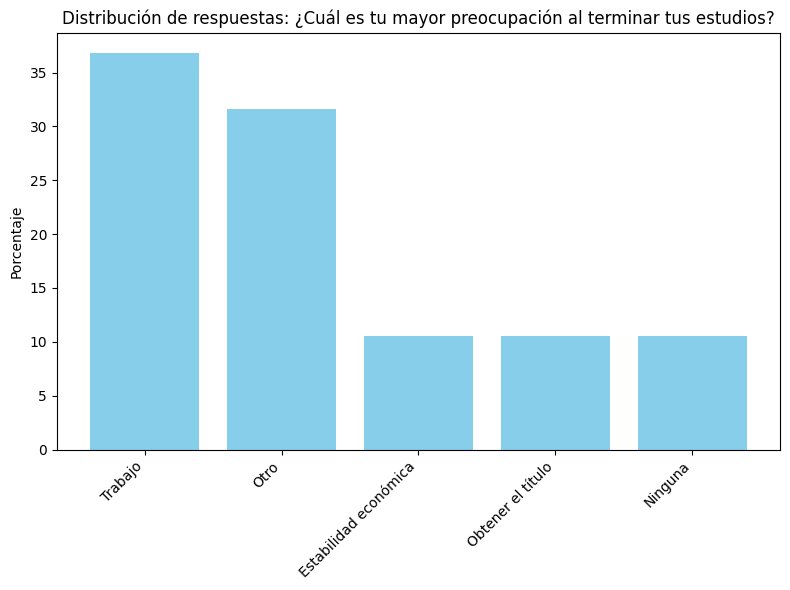

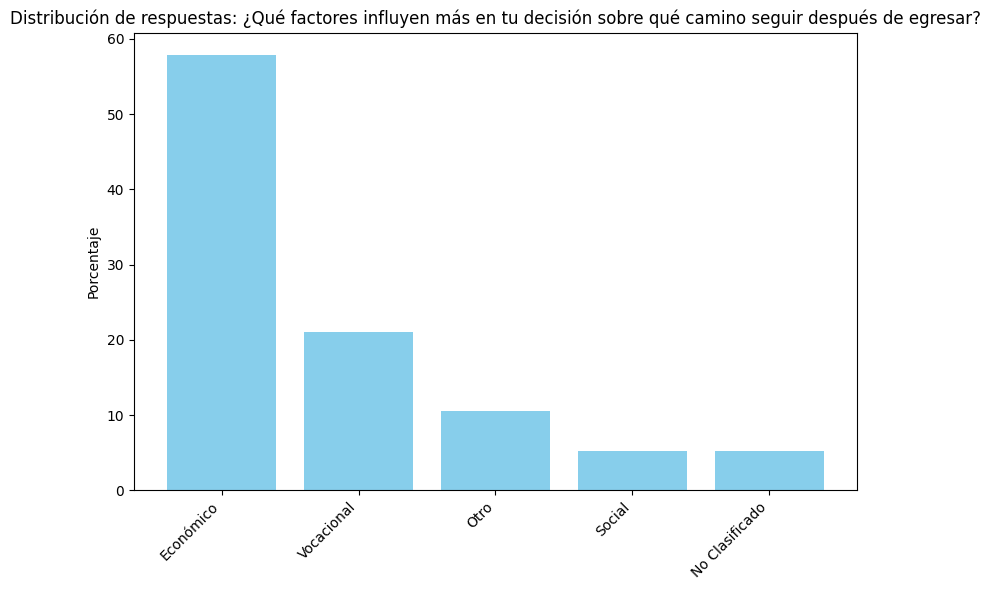

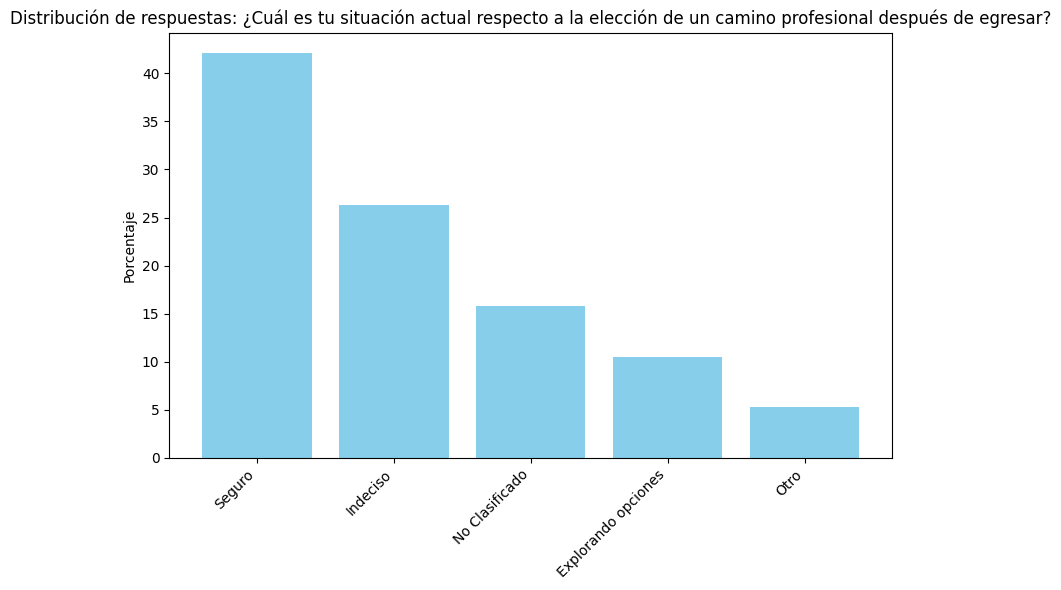

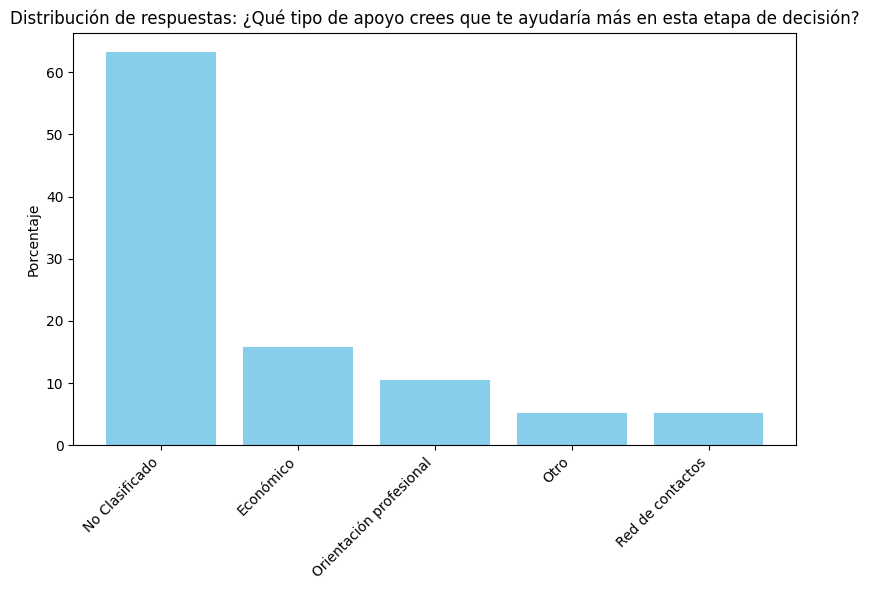

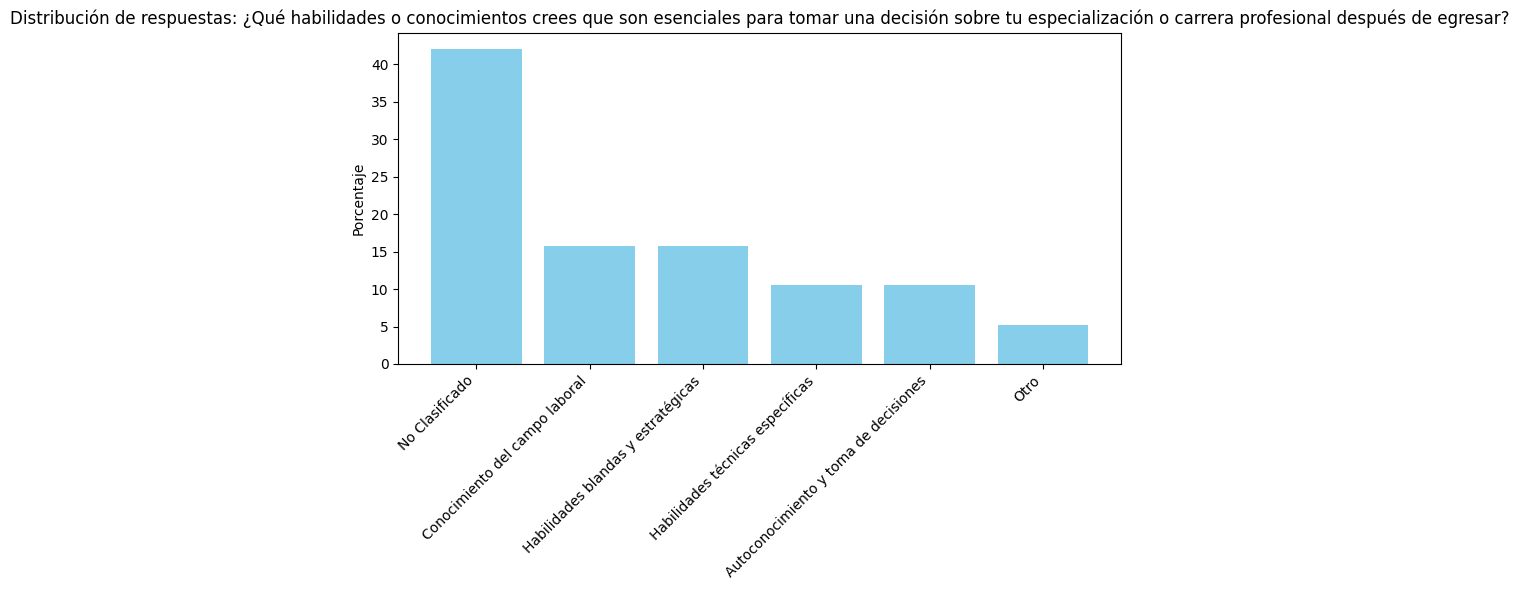

C:\Users\gudis\AppData\Local\Temp\ipykernel_12616\1433419496.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


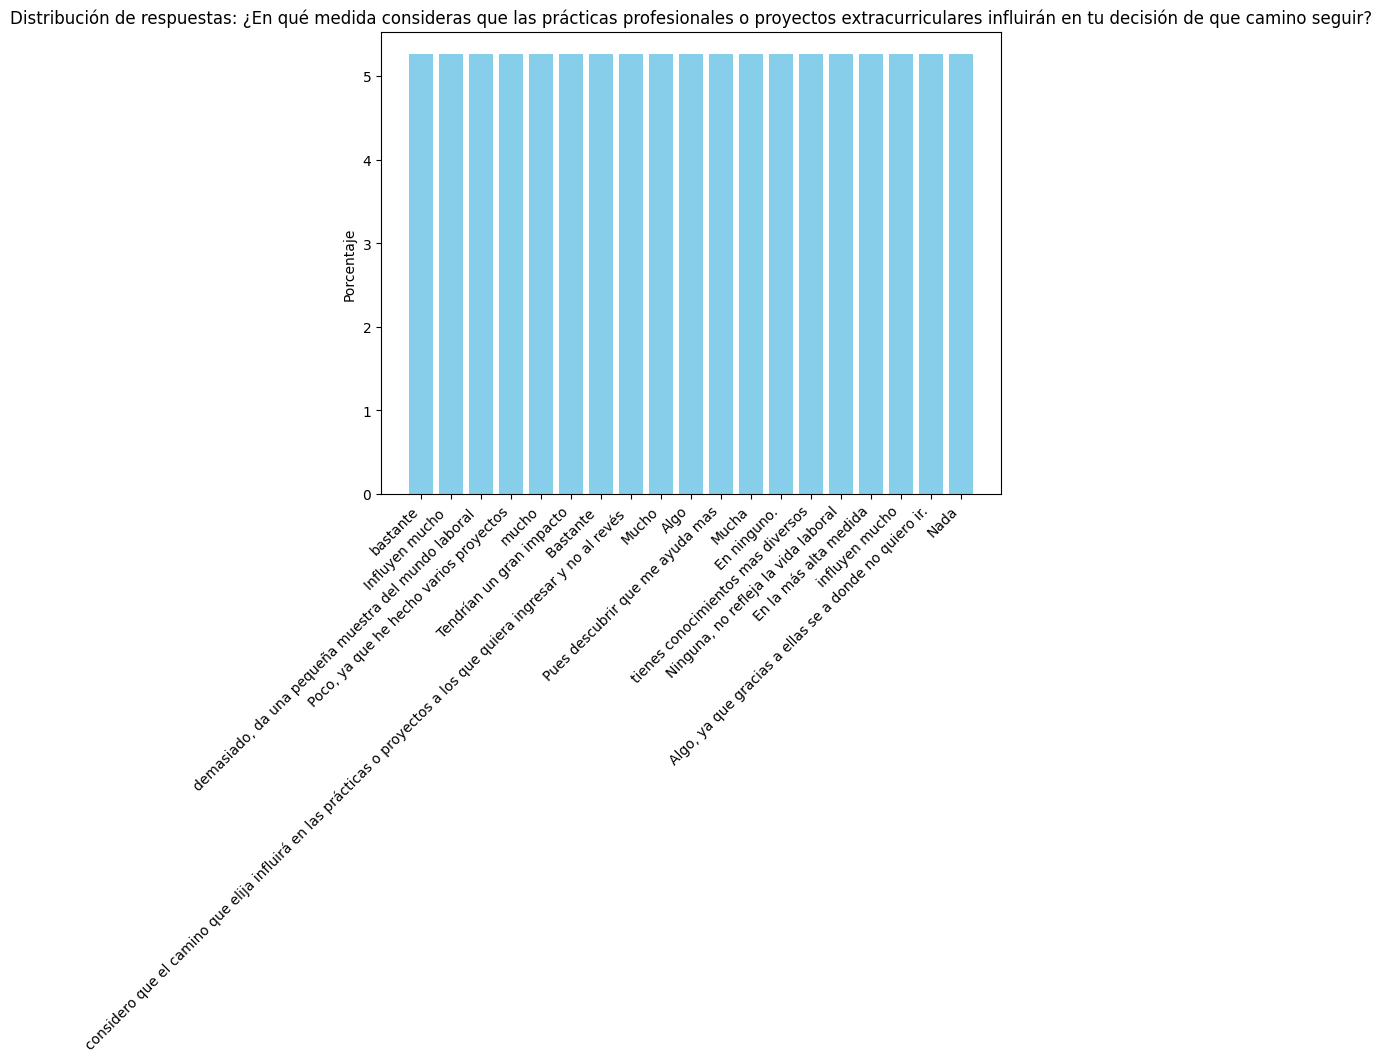

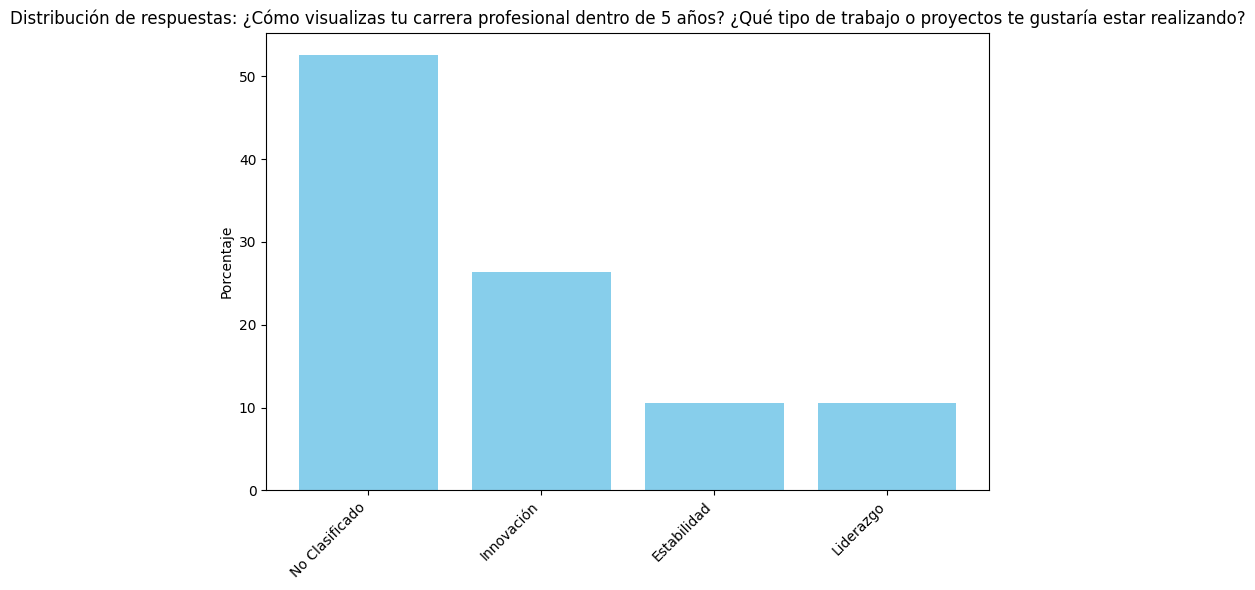

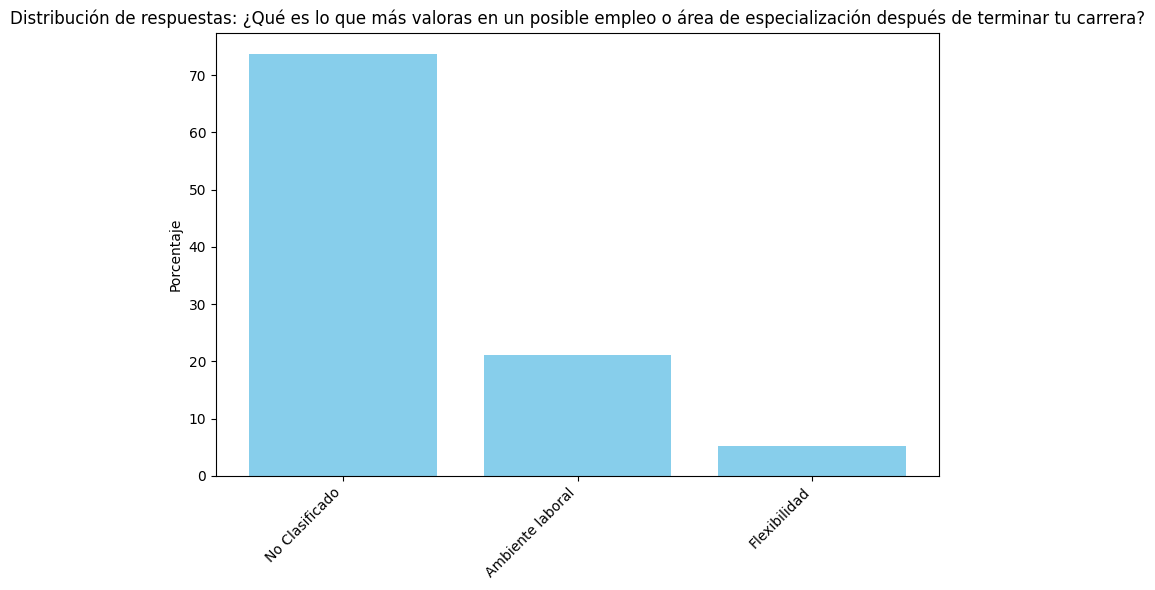

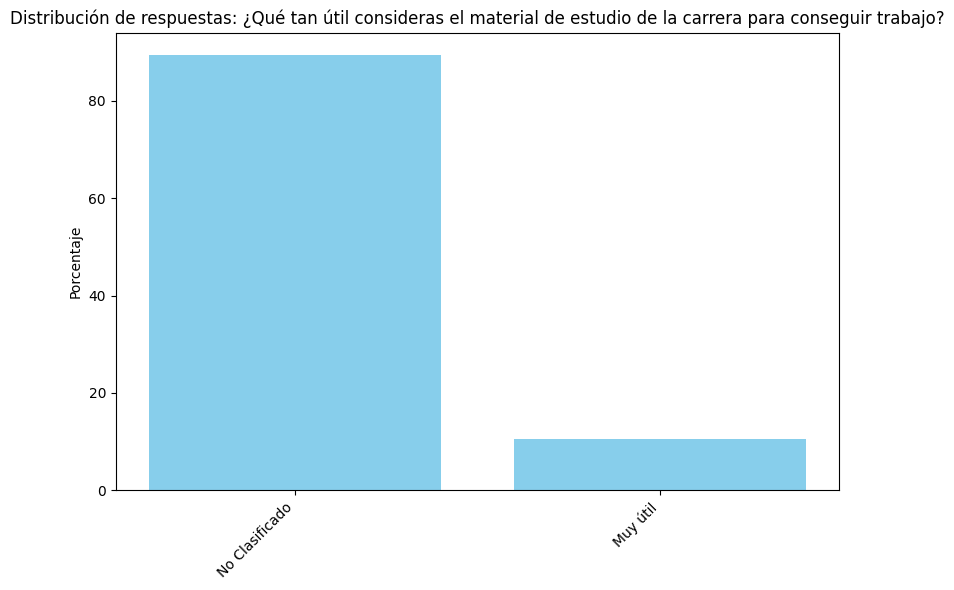

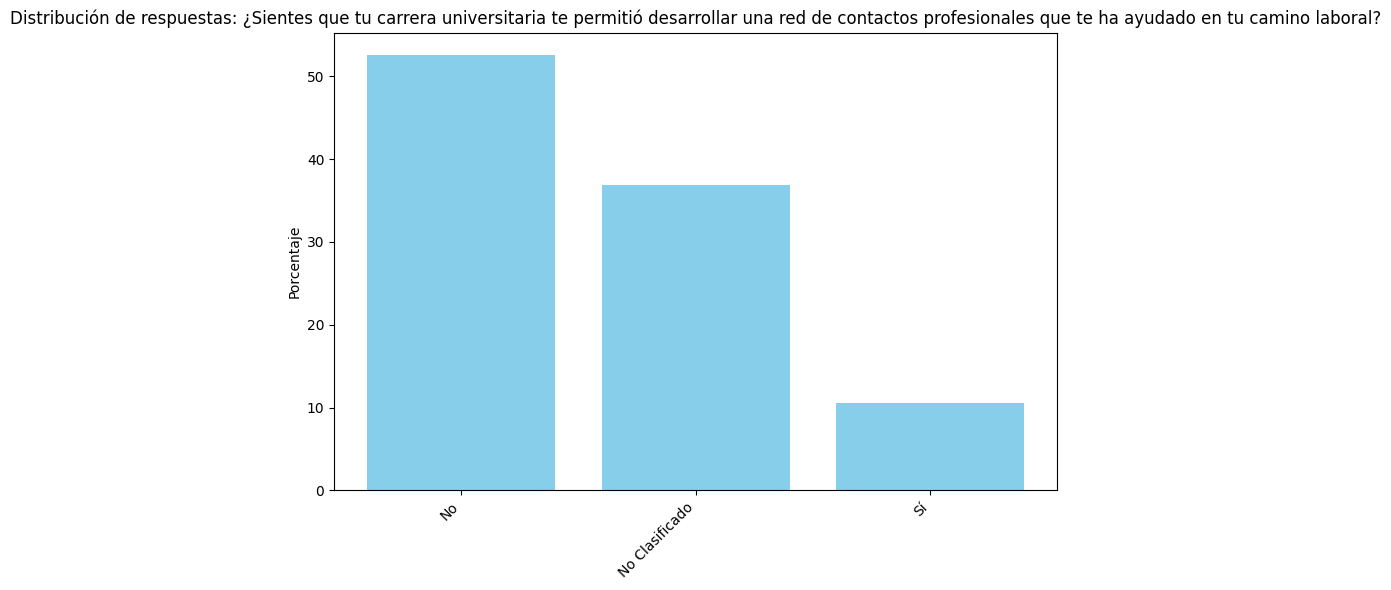

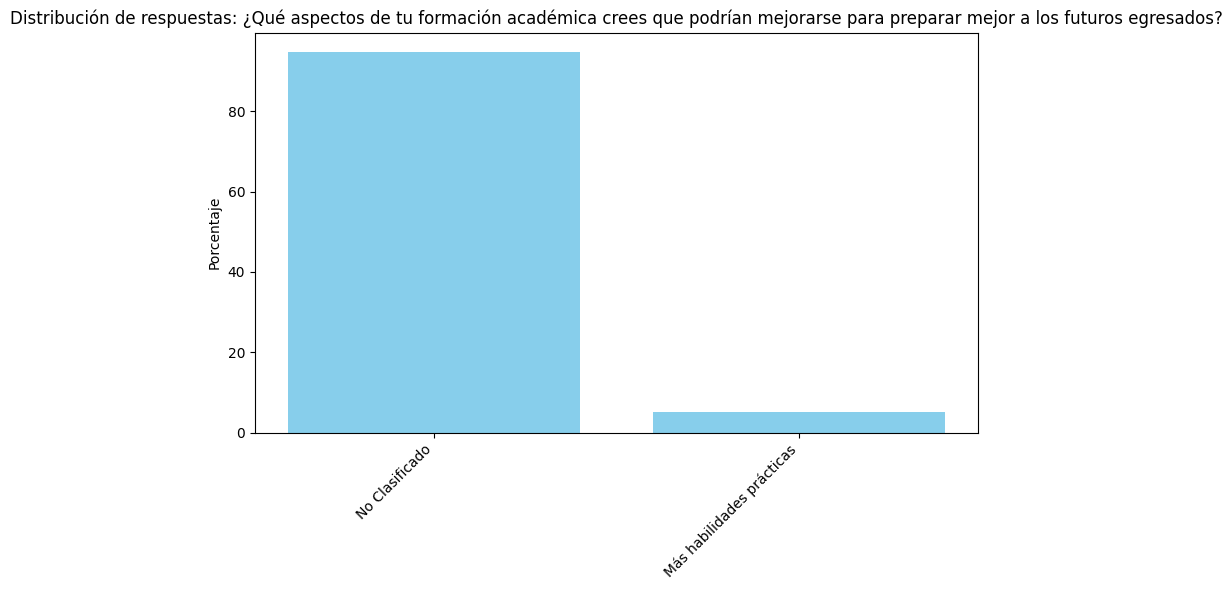

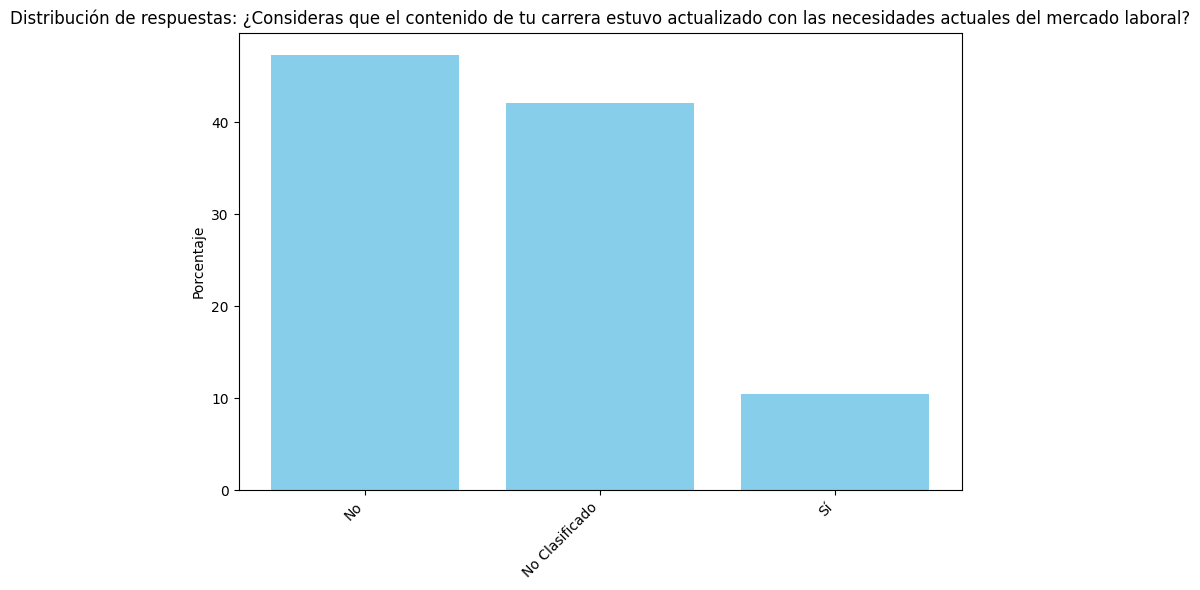

In [42]:
# Normalizar las respuestas del cuestionario 1
df_normalizado = procesar_cuestionario(dataframes[1], respuestas_esperadas[1])

# Calcular KPIs
kpis = calcular_kpis(df_normalizado)

# Mostrar los KPIs
for pregunta, distribucion in kpis.items():
    print(f"KPIs para la pregunta: {pregunta}")
    for categoria, porcentaje in distribucion.items():
        print(f"  {categoria}: {porcentaje:.2f}%")

# Graficar los KPIs
graficar_kpis(kpis)


In [ ]:
def clasificar_ahorro(row):
    ingreso = row["1. ¿Cuánto dinero generas al mes?"]
    ahorro = row["3. ¿Cuánto dinero logras ahorrar al mes?"]
    
    if pd.isna(ingreso) or pd.isna(ahorro) or ingreso == 0:
        return "No clasificado"
    
    ahorro_pct = ahorro / ingreso

    if ahorro_pct > 0.3:
        return "Ahorro alto"
    elif ahorro_pct >= 0.1:
        return "Ahorro medio"
    elif ahorro_pct > 0:
        return "Ahorro bajo"
    else:
        return "Sin ahorro"

# Función para clasificar estabilidad financiera
def clasificar_estabilidad(row):
    reserva = str(row["4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?"])
    deudas = str(row["5. ¿Tu dinero tiene liquidez o está comprometido en inversiones o deudas?"])
    
    if re.search(r"si", reserva, re.IGNORECASE):
        return "Financieramente estable"
    elif re.search(r"deuda", deudas, re.IGNORECASE):
        return "En riesgo financiero"
    else:
        return "Liquidez comprometida"

# Función para clasificar el uso del crédito
def clasificar_credito(row):
    tarjetas = row["9. ¿Cuántas tarjetas de crédito tienes?"]
    credito_disponible = str(row["10. ¿Qué porcentaje de tu línea de crédito tienes disponible actualmente?"])

    if tarjetas == 0:
        return "Sin crédito"
    elif re.search(r"0%", credito_disponible):
        return "Uso alto del crédito"
    elif tarjetas > 2:
        return "Uso moderado del crédito"
    else:
        return "Uso bajo del crédito"

# Aplicar funciones al DataFrame
df["Clasificación Ahorro"] = df.apply(clasificar_ahorro, axis=1)
df["Clasificación Estabilidad"] = df.apply(clasificar_estabilidad, axis=1)
df["Clasificación Crédito"] = df.apply(clasificar_credito, axis=1)

# Mostrar resultados
print(df[["Número de cuenta", "Clasificación Ahorro", "Clasificación Estabilidad", "Clasificación Crédito"]])

# Guardar el archivo con las clasificaciones

# Contar usuarios por categoría
indicadores = {
    "Total Usuarios": len(df),
    "Ahorro Alto (%)": (df["Clasificación Ahorro"] == "Ahorro alto").mean() * 100,
    "Ahorro Medio (%)": (df["Clasificación Ahorro"] == "Ahorro medio").mean() * 100,
    "Ahorro Bajo (%)": (df["Clasificación Ahorro"] == "Ahorro bajo").mean() * 100,
    "Sin Ahorro (%)": (df["Clasificación Ahorro"] == "Sin ahorro").mean() * 100,
    "Financieramente Estable (%)": (df["Clasificación Estabilidad"] == "Financieramente estable").mean() * 100,
    "En Riesgo Financiero (%)": (df["Clasificación Estabilidad"] == "En riesgo financiero").mean() * 100,
    "Liquidez Comprometida (%)": (df["Clasificación Estabilidad"] == "Liquidez comprometida").mean() * 100,
    "Uso Alto de Crédito (%)": (df["Clasificación Crédito"] == "Uso alto del crédito").mean() * 100,
    "Uso Moderado de Crédito (%)": (df["Clasificación Crédito"] == "Uso moderado del crédito").mean() * 100,
    "Uso Bajo de Crédito (%)": (df["Clasificación Crédito"] == "Uso bajo del crédito").mean() * 100,
    "Sin Crédito (%)": (df["Clasificación Crédito"] == "Sin crédito").mean() * 100,
    "Promedio de Tarjetas": df["9. ¿Cuántas tarjetas de crédito tienes?"].mean(),
}

# Convertir en DataFrame para exportar a BI
df_indicadores = pd.DataFrame(indicadores, index=[0])

KeyError: '4. ¿Tienes dinero reservado para emergencias? Si sí, ¿cuánto aproximadamente?'